In [1]:
#import pandas, matplotlib, datetime, seaborn

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns

#read file 'netflix_titles.csv'
df = pd.read_csv('netflix_titles.csv')

In [2]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Text(0.5, 0, 'count type Movie and TV Show')

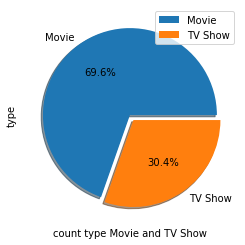

In [19]:
#count Movie and TV Show (plot pie)

df['type'].value_counts().plot(kind='pie',legend=True, autopct='%1.1f%%',shadow = True, explode=(0,.07))
plt.xlabel('count type Movie and TV Show')

In [43]:
#convert date_added to datetime

df['date_added'] = pd.to_datetime(df['date_added'])
df['date_added']
df['date_added_year'] = df['date_added'].dt.year
df['date_added_year'].fillna(0).astype('int64')

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2019
8803    2019
8804    2019
8805    2020
8806    2019
Name: date_added_year, Length: 8807, dtype: int64

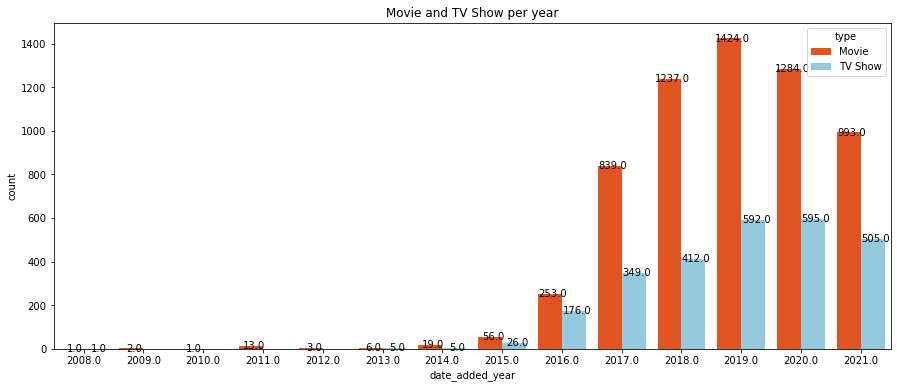

In [118]:
# calculate Movie and TV Show per year


type_per_year = df.groupby('date_added_year')['type'].value_counts()
#type_per_year.plot(kind='bar',alpha=.7,figsize=(15,6))
plt.figure(figsize=(15,6))
plt.title('Movie and TV Show per year')
ax = sns.countplot(x='date_added_year', hue='type', data=df, palette=['orangered', 'skyblue'],)
for p in ax.patches:
    count= p.get_height()
    x=p.get_x()+0.25
    y= p.get_height()+1
    ax.annotate(count, (x,y), ha='center', va='center')
plt.show()

Text(0.5, 0, 'count country')

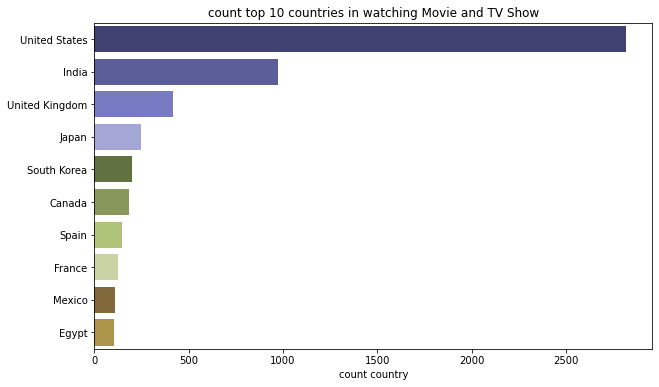

In [94]:
# top countries watching and following netflix

top_10_countries = df['country'].value_counts()[:10]
plt.figure(figsize=(10,6))
plt.title("count top 10 countries in watching Movie and TV Show")
sns.barplot(x = top_10_countries, y = top_10_countries.index, palette='tab20b')
plt.xlabel('count country')

Text(0, 0.5, '"count"')

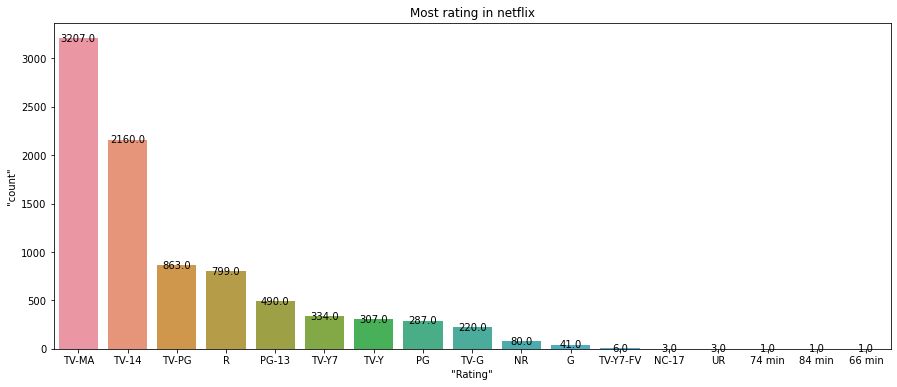

In [125]:
# most rating netflix depends on

rating = df['rating'].value_counts()
plt.figure(figsize = (15,6))
plt.title("Most rating in netflix")
ax = sns.barplot(x = rating.index, y = rating)
for p in ax.patches:
    count= p.get_height()
    x=p.get_x()+0.4
    y= p.get_height()+1
    ax.annotate(count, (x,y), ha='center', va='center')
plt.xlabel("\"Rating\"")
plt.ylabel("\"count\"")

In [50]:
# create duration min column to caculate mean duration

df['duration_min'] = df['duration'].str.strip(' min')

df.loc[df.duration.str.contains('Seas',na=False),['duration_min']] = 0
df['duration_min'].fillna(0).astype('int64').mean()

69.28681730441694

Text(0, 0.5, 'seasons')

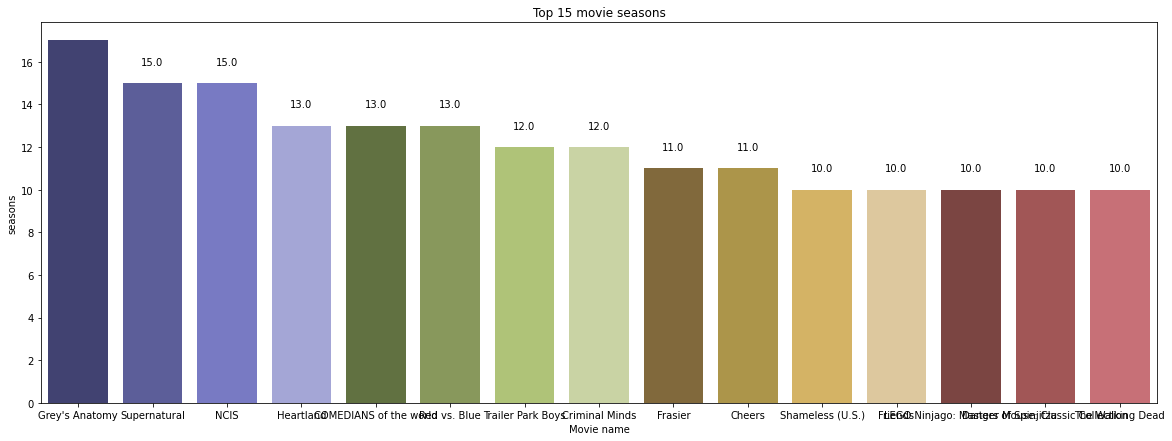

In [14]:
# create duration season column and appear bigest seasons movies

df['duration_season'] = df['duration'].str.strip(' Season')
df.loc[df['duration'].str.contains('min',na=False),['duration_season']]=0
df['duration_season'] = df['duration_season'].fillna(0).astype('int64')
plt.figure(figsize = (20,7))
plt.title("Top 15 movie seasons")
season = df[df['duration_season']!=0].sort_values('duration_season', ascending = False)[['title','duration_season']].head(15)
ax = sns.barplot(x = 'title', y = 'duration_season' ,data = season, palette='tab20b')
for p in ax.patches:
    count= p.get_height()
    x=p.get_x()+0.4
    y= p.get_height()+1
    ax.annotate(count, (x,y), ha='center', va='center')
plt.xlabel('Movie name')
plt.ylabel("seasons")

In [43]:
#split listed_in column

df[['listed_in_one','listed_in_two','listed_in_three']] = df['listed_in'].str.split(',', expand=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_season,listed_in_one,listed_in_two,listed_in_three
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",0,Documentaries,None,None
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,International TV Shows,TV Dramas,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Crime TV Shows,International TV Shows,TV Action & Adventure
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Docuseries,Reality TV,None
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,International TV Shows,Romantic TV Shows,TV Comedies


In [49]:
# calculate type of listed_in

listed_in_one = df['listed_in_one'].value_counts()
listed_in_two = df['listed_in_two'].value_counts()
listed_in_three = df['listed_in_three'].value_counts()
total = listed_in_one + listed_in_two + listed_in_three
total